# Prac 2 - Getting the Data I need

## Instructions
<strong> This Prac is assessed, and the tasks are based on the demos/content from labs / lecture / tutorial and their materials. </strong>

Complete the tasks given. 

* <strong>Make sure the R script submitted has no syntactical error, in which case a zero will be awarded for this Prac. Tutors will direct you on how to identify syntactical errors in your script.</strong>

Additional Note
* Variable names and strings are case-sensitive in R
* Use of any packages to achieve the objective is strictly prohibited - unless explicitly mentioned in the question to do so
* Any updates regarding the Pracs will be posted on <strong>[Ed discussion](https://edstem.org/au/courses/10549/discussion/)</strong>
* You may find it helpful to read through the whole notebook and learn from the examples first, before solving the problems

## Submission [After Prac 2]

This notebook, along with the "Prac1" notebook will make upyour "Practical Assessment 1" task which is worth 10% and is due **at 4pm on Friday March 31st (end of Week 6)** 

After completing the tasks in this notebook, download the notebook as an R file to your local system. This can be done by "File > Download as > R". Rename the downloaded R file with your "UQ Login-id" and the specific prac - for example, `s4477608-Prac1.R`

For jupyter lab environment:  "File > Save and Export Notebook As... > Executable Script", Name the file with your "UQ Login-id“， the specific prac, and the .R suffix (as above: `s4477608-Prac1.R`)

* If you are not working within the UQ zones, please ensure you upload this .R file to your jupyter notebook inside the UQ zone; use the same folder as that of this notebook, that is, inside "Prac1" folder.
* Once you complete all the two practicals, bundle these two .R files (from Prac 1 and Prac 2) together inside a zip file using your student identifier (s4477608-practical-1.zip) and submit it on the LMS "Assessment Tasks > Practical Assessment 1"
    * That is, your .zip file should contain two .R files; one for the first, and one for the second practical.

## Part 1 - Assessing the Ethical Use of Data

An important ethical consideration for releasing data is making sure that it is properly de-anonymised. In this part of the pratical, we will demonstrate how a dataset that at first seems  anonymised may potentially be de-anonymised. We will also walk through some potential steps to mitigate this risk.

Let's say we have been given access to an *anonymised* dataset containing UQ student GPA information. Someone has attempted to anonymise this dataset by removing student names and IDs from the data. **Download the dataset onto your local machine, and it will be imported to the database later**:

[student_data_anon.csv](./student_data_anon.csv)

Let's also say we've managed to access a separate dataset that contains names, ages and postcodes from a UQ sporting club. **Download the dataset onto your local machine, and it will be imported to the database later**:

[club_data.csv](./club_data.csv)

Using the club dataset, can we possibly de-anonymise some of the students contained within the GPA dataset? Have a look at both datasets and their headers in Excel, can you think of any ways we can combine the two datasets to determine the names of the students in the anonymised student data?

### Databases

In the first prac we imported data from a single flat file using R. Data is commonly spread across multiple data sets or files, and often more insightful information can be gained by combining several datasets.

One solution for exploring multiple datasets is to import the datasets into a *database*. In this practical, we will look at the relational database `MySQL`, which uses a standard format to interact, merge and answer questions with data called SQL (Structured Query Language).

We will demonstrate the use of exploring multiple datasets by attempting to *de-anonymise* data after importing it into `MySQL`.

### Importing into Phpmyadmin
phpMyAdmin is a web tool designed to handle administrating MySQL databases. Your zone already has MySQL and phpMyAdmin configured, you can find it at `https://data7001-XXXXXXX.uqcloud.net/phpmyadmin/` (**replacing** XXXXXXX with **your zone id**. For example, if `https://data7001-`06431cf7`.uqcloud.net/` is your jupyter zone link then `06431cf7` is your zone id. So link for phpMyAdmin would be `https://data7001-`06431cf7`.uqcloud.net/phpmyadmin`).

Or, if you already opened this notebook in the UQ zone, just simply copy the adress of the current page, and replace the `jupyter/lab?` part with `phpmyadmin`

The first thing we need to do is to import our CSV files into phpMyAdmin. If the CSV is in the correct format, MySQL will parse the CSV file, create the associated `table` and import the data into the table as rows. A MySQL table consists of rows and columns. Columns specify the *type* of data (e.g. whether it is text, a number, a 'True' or 'False' value etc) and the rows contain the actual data itself. Below is a visual representation of a MySQL table, as displayed by phpMyAdmin:

![](img/mysql-table-in-phpmyadmin.png)

Let's import the `student_data_anon.csv` file first. On the top menu of phpMyAdmin, select the `Import` option. Under the **File To Import** header, click the 'Choose File' button and browse to the location of `student_data_anon.csv` on the local system. Under the **Format** header, select `CSV` in the drop down menu, and enable the option "The first line of the file contains the table column names". Then press the `Import` button.

<img src="img/mysql-import-1.png" width="460" height="460"><img src="img/mysql-import-2.png" width="460" height="460">

This will create a database called "CSV_DB 6" (`CSV_DB` is a generic filler name, and `6` indicates it is the sixth database as there are 5 databases loaded by default already) and a table already called 'student_data_anon' which is then filled in with the values from our CSV file. We can rename the database name by either clicking the **Operations** tab in the top menu or the database icon next to the database name in the left hand menu, and rename the database to `CSV_DB` under **Rename database to** and press the `Go` button.

<img src="img/mysql-rename-1.png" width="160" height="160"> <img src="img/mysql-rename-2.png" width="660" height="660">

Let's import our second dataset now - `club_data.csv`. First click `CSV_DB` on the left hand menu so we are operating within the same database as our first dataset. Then press the "Import" tab on the top menu and follow the same steps previously outlined to import our second dataset. Rename the new table to `club_data`.

### Exploring The Data

Let's now have a look at how we can use SQL to ask some interesting questions about the data. Click on CSV_DB again in the left hand column and then click the 'SQL' tab on the top menu.

This menu allows us to query the database using the SQL language. 

For example, we might ask something like - how many females are in our dataset? Try pasting in the following SQL query into the bottom input box under **Run SQL query/queries on table CSV_DB.student_data_anon:** and then press `Go`.

```
SELECT COUNT( * ) 
FROM student_data_anon
WHERE gender =  'F'
```

We can add as many filters as we want to start asking more specific questions - how many females in our dataset had a GPA less than 4?

```
SELECT COUNT( * ) 
FROM student_data_anon
WHERE gender =  'F'
AND GPA < 4.0
```

You can see from the above example queries that SQL statements follow a general format. We have a `SELECT <x>` query that specifies what specific results we want - in this case, the `COUNT(*)` function returns the number of rows that matches a specified criteria. We then have a `FROM` statement which specifies which **table** we want to pull our results from. We could easily run the first query against the `club_data` table (how many women are in the club_data dataset?) with the following syntax:

```
SELECT COUNT( * )
FROM club_data
WHERE gender = 'F'
```

The last `WHERE` clause specifies our filter, and the `AND` statement can be used to add more filters.


|<center>TASK 1.1 </center>|
| ---- |
| Modify and execute the above query to determine how many **men** had a GPA **greater than** 4.0 in our `student_data_anon` table? Provide **SQL query** and the **reuslt**. <br> Store the SQL Query as text inside "menGt4_SQL" R variable, and the final answer inside "menGt4" R variable. <br>You can hard-code the final answer inside R variables. 
In other words, you should **create and run your SQL query in MySQL**, and **provide your results following the format in R**. |

In [1]:
# [Place your Answer here. Below is an example assignment, which you should modify as per the question]
menGt4_SQL = "SELECT
    COUNT(gender)
FROM
    student_data_anon
WHERE
    gender LIKE 'M' AND GPA > 4.0;"
menGt4 = 267

**Make sure you include your code for all questions requiring coding.**

SQL supports many more functions. A tutorial on many of them are available at https://www.w3schools.com/sql/. The following task requires using the `AVG` and `MAX` functions.

|<center>TASK 1.2</center>|
| ---- |
| (a) what is the **average** GPA of the students in the`student_data_anon` table? Store the SQL Query as text inside "avgGpa1_SQL" R variable, and the result inside "avgGpa1".  <br>
(b) What is the **maximum** GPA? Store the SQL Query as text inside "maxGpa1_SQL" R variable, and the result inside "maxGpa1" R variable. <br> You can hard-code the final answer inside R variables.|

In [2]:
# [Place your Answer here]
avgGpa1_SQL = "SELECT AVG(GPA) FROM student_data_anon;"
avgGpa1 = 4.553300
maxGpa1_SQL = "SELECT MAX(GPA) FROM student_data_anon;"
maxGpa1 = 6.99

We are often interested in the groups within a collection of data, and the `group by` statement in SQL is useful for this. See https://www.w3schools.com/sql/ for an example. There are also some examples of using `group by` below, and you want may to answer the task below after you study them.

|<center>TASK 1.3</center>|
| ---- |
| Write a SQL query to generate a table of **all unique** postcodes and the **corresponding average** GPAs for students living in areas with the **same postcode**, with the postcodes **ordered by increasing** average GPAs. 
Store the SQL query inside "incAvgGpa_SQL" R variable. <br> Store the postcode which has the highest average GPA inside "highestAvg1" R variable. <br> You can hard-code the final answer inside R variables. |

In [3]:
# [Place your Answer here]
incAvgGpa_SQL = "SELECT postcode, AVG(GPA) AS avg_gpa FROM student_data_anon GROUP BY postcode ORDER BY avg_gpa ASC;"
highestAvg1 = 4069

### Combining Tables
So we now know how to do some very basic queries across a single table. However, we want to be able to use *both tables* to see if we can use information from the club data to identify some of the users in the student dataset. This `club_data` dataset will be our *adversarial* dataset.

As gender, age and postcode are available in both datasets, these three fields will be our *quasi-identifiers*. Quasi-identifiers are pieces of information that, alone, are not able to uniquely identifiy a record. However, they are correlated enough to potentially create a unique identifier.

In our student data example, trying to identify a student based on gender, age or postcode alone would be difficult. However, the combination of all three may be sufficient to identify individuals.

Our goal is to use our `club_data` dataset which contains these quasi identifiers to deanonymise this data. We can achieve this by using an *inner join* in MySQL. An inner join allows us to match rows in one table with rows in another table only if both tables meet the conditions specified.

For example, let's say we have only 2 entries in club_data that looks like the following:

| gender | age | postcode | firstname | surname  |
|--------|-----|----------|-----------|----------|
| F      | 23  | 4068     | Jane      | Anderson |
| M      | 20  | 4044     | Thomas    | Hill     |

We also have 3 entries in student_data_anon that looks like the following:

| gender | age | postcode | GPA |
|--------|-----|----------|-----|
| M      | 31  | 4011     | 5.3 |
| F      | 23  | 4068     | 5.5 |
| F      | 20  | 4000     | 4.0 |

Is there a combination of gender, age and postcode that appear in both tables?

If we do an *inner-join* on the tables on these elements, we can combine the tables on these matching entries, and get a result that looks like the following:

| gender | age | postcode | firstname | surname  | GPA |
|--------|-----|----------|-----------|----------| --- |
| F      | 23  | 4068     | Jane      | Anderson | 5.5 |

You can see from this example that an *inner-join* is the act of selecting *matching entries* for specific *identifiers* from two different tables.

![](img/inner-join.png)

Let's do the same thing to our actual datasets and see if we can potentially match individuals to their GPA. Open the SQL editor again, and submit the following query:

```
SELECT c.* , s.GPA
FROM club_data c
INNER JOIN student_data_anon s ON ( s.gender = c.gender) AND (s.age = c.age) AND (s.postcode=c.postcode)
```

|<center>TASK 1.4</center>|
| ---- |
| Are there any **gender,age,postcode** combinations that have **more than one** matching individual? If yes, **how many** such combinations are there? <br> Store the SQL query and final answer for the count of combinations inside "gap1_SQL" and "gap1" R variables respectively. <br> You can hard-code the final answer inside R variables.|

In [4]:
# [Place your Answer here]
gap1_SQL = "SELECT
    s.gender,
    s.age,
    s.postcode,
    COUNT(*) AS NUMBER
FROM
    student_data_anon s
JOIN club_data c ON
    (c.gender = s.gender) AND(c.age = s.age) AND(c.postcode = s.postcode)
GROUP BY
    gender,
    age,
    postcode
HAVING
    COUNT(*) > 1;
"
gap1 = 90

|<center>TASK 1.5</center>|
| ---- |
| What is **Debra Gibson**'s GPA? <br> Store the SQL Query and final answer inside "debra1_SQL", and "debra1" R variables respectively. <br> You can hard-code the final answer inside R variables. |

In [5]:
# [Place your Answer here]
debra1_SQL = "SELECT s.GPA
FROM club_data c
INNER JOIN student_data_anon s ON ( s.gender = c.gender) AND (s.age = c.age) AND (s.postcode=c.postcode)
WHERE c.first_name = 'Debra' AND c.last_name = 'Gibson';"

debra1 = 5.87

### K-Anonymity
The above examples demonstrate that student_data_anon, despite having the names removed, is still vulnerable to de-anonymisation with an adversarial dataset. One potential method of better anonymising the data is to make sure it satisfies the *k-anonymity* property for our quasi-identifiers of gender, age and postcode.

So far we have only *read* data from MySQL, but for this part of the prac we want to modify the data in the database using the `UPDATE` command.

Let's first copy our original database so we do not lose any accidental data! First click on the database name on the left column, `CSV_DB`. Then, one the top menu, click the 'Operations' tab. Under the 'Copy Database To' heading, give your database copy the name `CSV_DB_CP`, and make sure "Structure and data" and "CREATE DATABASE before copying" and "Add AUTO_INCREMENT value" is selected.

We will now perform all our queries on our new copy of the database, click the 'CSV_DB_CP' database on the left and open the Query menu again.

Recall from your lectures that k-anonymity property is satisfied for each individual if for each unique combination of quasi-identifiers, there are *at least k-1 individuals whose information also appear in the dataset*.

We can use the following SQL statement to demonstrate how many individual rows match certain combinations of gender, age and postcode:

```
SELECT gender, age, postcode, COUNT( * ) AS counts
FROM student_data_anon
GROUP BY gender, age, postcode
```

Can we modify our anonymised student data such that there are at least two rows in every unique combination of gender, age and postcode (2-anonymity)?

One solution may be to rounding the ages to the nearest decade. So a student who is 17 gets changed to 20, and a student who is 34 gets changed to 30.

We can use the MySQL "round()" function to round values.

Enter the following command to update the ages in the `student_data_anon` table to the nearest decade.

```
UPDATE student_data_anon SET age = ROUND(age, -1)
```

Make sure it worked by examining the table:

```
SELECT * 
FROM student_data_anon
```

Do we have less unique combinations now? Let's try our original combination count query but limit results to only those that have a count of "1":

```
SELECT gender, age, postcode, COUNT( * ) AS counts
FROM student_data_anon
GROUP BY gender, age, postcode
HAVING COUNT( * ) = 1
```

Unfortunately it looks like there are still unique combinations. What if we round postcodes to the nearest ten, too?

```
UPDATE student_data_anon SET postcode = ROUND(postcode, -1)
```

It looks like we still have a few issues - many students over 40 are still uniquely identifiable, and it looks like students that had data entry issues without a gender specified are also still unique.

One potential solution might be to remove any entries that have poor data, so our dataset only includes full entries. Lets submit another query where all entries that have an empty 'gender' column are removed:

```
DELETE FROM student_data_anon WHERE gender =  ''
```

Let's also update ages so that any entry with an age greater than 50 is set to 50:

```
UPDATE student_data_anon SET age = 50 WHERE age > 50
```

Let's have a look again to see if we still have any unique combinations:
```
SELECT gender, age, postcode, COUNT( * ) AS counts
FROM student_data_anon
GROUP BY gender, age, postcode
HAVING COUNT( * ) = 1
```

It looks like we have successfully removed all unique identifying combinations of our *quasi-identifiers*, gender, age and postcode!

We can use the following query to find the new minimum frequency of each combination of gender, age and postcode:

```
SELECT MIN( mycount ) 
FROM (
SELECT COUNT( * ) mycount
FROM student_data_anon
GROUP BY gender, age, postcode
) AS counts
```

|<center>TASK 1.6</center>|
| ---- |
| What **level of k-anonymity** is our dataset now? Store the answer inside "k1" variable. <br> You can hard-code the final answer inside R variables. |

In [6]:
# [Place your Answer here]
k1 = 2

## Part 2 - Reasoning with sampling strategies

Sampling is the process where only a subset of the data is selected for analysis. This may be due to
* data being extremely large to process
* challenges in collecting the entire data


There are different types of sampling like
* Simple Random Sampling
* Weighted Sampling
* Stratified Sampling
* Systematic Sampling
* ...

The below tasks are based on sampling


### Simple Random Sampling

As we saw in lectures, simple random sampling with replacement (SRSWR) can be accomplised as follows.  

Suppose the rows of the n by d array "data" correspond to entries from which we wish to resample m times.

The syntax of the R command is:

`datasample<-data[sample(1:n,m,replace=TRUE),]`

Let us try this now with the anonymised student data.  

We will now load the data into R and display summary statistics.

Note that, for simplicity, we will drop any rows with missing data, and only deal with complete cases.

In [7]:
data <- read.csv("student_data_anon.csv", na.strings=c("", "NA"))
data <- data[complete.cases(data),]
data <- as.data.frame(data)
summary(data)
mean(data$age)

       id           gender               GPA             age       
 Min.   :  0.0   Length:835         Min.   :1.040   Min.   :18.00  
 1st Qu.:223.5   Class :character   1st Qu.:3.505   1st Qu.:23.00  
 Median :450.0   Mode  :character   Median :4.720   Median :29.00  
 Mean   :447.8                      Mean   :4.539   Mean   :31.46  
 3rd Qu.:673.5                      3rd Qu.:5.680   3rd Qu.:37.00  
 Max.   :897.0                      Max.   :6.990   Max.   :72.00  
    postcode      program         
 Min.   :4000   Length:835        
 1st Qu.:4067   Class :character  
 Median :4101   Mode  :character  
 Mean   :4088                     
 3rd Qu.:4105                     
 Max.   :4169                     

[1] 31.46347

We will now take a SRSWR of size 100 from the 835 case-complete rows, and compute the mean GPA of the sample.

In [8]:
set.seed(7001) # make sure the sampling result is reproducible 
datasample<-data[sample(1:nrow(data),100,replace=TRUE),]
mean(datasample$GPA)

[1] 4.672

Suppose we are interested in calculating the mean GPA by gender, as well as the number of observations by gender.  

We will now do so.

In [9]:
aggregate(GPA~gender, datasample, mean)
aggregate(GPA~gender, datasample, length)

gender,GPA
<chr>,<dbl>
F,4.433488
M,4.851930


gender,GPA
<chr>,<int>
F,43
M,57


We have taken a single SRSWR from our overall dataset and computed the mean GPA by gender.  

Repeated resampling is the basis of **bootstrapping**, wherein one constructs a set of statistics of the repeated samples.

For more information on Bootstrapping, see page 209 of the following text (Section "5.2 The Bootstrap"): https://hastie.su.domains/ISLR2/ISLRv2_website.pdf

These then give one an empirical understanding of the distribution of those statistics as they relate to the population of interest.

We will now compute and store the mean by gender for a SRSWR of size 100 repeatedly (1000 times), compute summary statistics of the mean by gender, and display a histogram of the mean by gender.

In [10]:
meanGPAbygender<-data.frame(sample=integer(),FGPA=double(),MGPA=double())
for (i in 1:1000){
    set.seed(i)
    datasample<-data[sample(1:nrow(data),100,replace=TRUE),]
    temp<-as.data.frame(aggregate(GPA~gender, datasample, mean))
    temp$gender<-NULL
    meanGPAbygender[i,]<-c(i,t(temp))
}

summary(meanGPAbygender)

     sample            FGPA            MGPA      
 Min.   :   1.0   Min.   :3.932   Min.   :3.897  
 1st Qu.: 250.8   1st Qu.:4.457   1st Qu.:4.336  
 Median : 500.5   Median :4.613   Median :4.474  
 Mean   : 500.5   Mean   :4.611   Mean   :4.473  
 3rd Qu.: 750.2   3rd Qu.:4.753   3rd Qu.:4.611  
 Max.   :1000.0   Max.   :5.325   Max.   :5.069  

Now let us plot the histograms.

A histogram is a simple and widely used graphical representation of the distribution of numerical data.  

The range of data is partitioned into bins, and the number of data entries in each bin (the frequencies) are counted.  The histogram is then constructed as a collection of rectangles whose base is the bin and whose height is the corresponding bin's frequency.  See also https://en.wikipedia.org/wiki/Histogram 

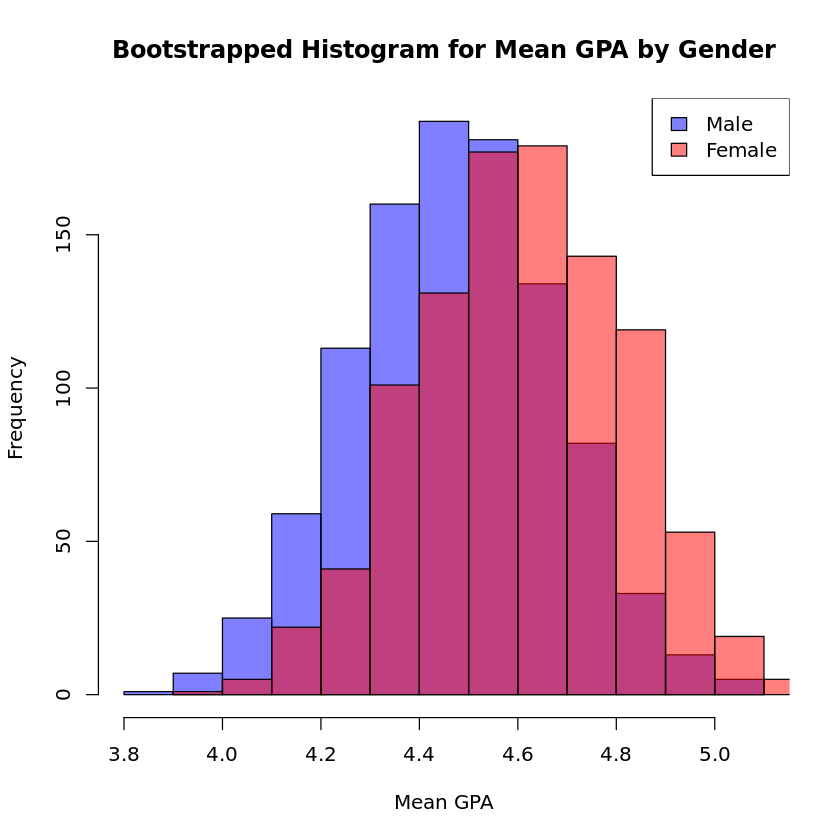

In [11]:
hist(meanGPAbygender$MGPA, col=rgb(0,0,1,0.5),main="Bootstrapped Histogram for Mean GPA by Gender", xlab="Mean GPA")
hist(meanGPAbygender$FGPA, col=rgb(1,0,0,0.5),add=TRUE)
legend("topright", c("Male","Female"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

|<center>TASK 2.1<center>|
| ------- |
|<center>From the **histograms and summary statistics** above, what can you say about the **comparative *location*** or ***central tendency*** of the **mean** GPA between the two groups? How about the **comparative *spread*** or ***variability*** of the **mean** GPA? <center>|

##### [Place your Answer here in text, No coding needed]

We can find that the number of people in the range of 4.4-4.7 is the largest, at less than 4.5, the number of men is higher than the number of women, but above 4.6 the number of women is significantly higher than the number of men.
The average gpa for men is more concentrated in the 4.3-4.6 range, while for women it is more concentrated in the 4.4-4.8 range. the average gpa for men is more spread out.

### Weighted Random Sampling

For SRSWR, each observation is equally likely to appear in the sample.  Sometimes, we wish to select each observation with a probability proportional to a specified weight.  As an illustrative example, we may have demographic data from the ABS which tells us the actual proportions of males and females by age-group enrolled at university, and we wish to correct for *sampling bias*.

For the purposes of this practical, we will create a non-negative weight without any special meaning for each of the n rows in our data set.

In [12]:
# Generate some random weights which are non-negative and sum to 1
set.seed(55) # make sure the sampling result is reproducible 
data$weights<-runif(nrow(data))
data$weights<-data$weights/sum(data$weights)

weighteddatasample<-data[sample(1:nrow(data),100,replace=TRUE,data$weights),]

|<center>TASK 2.2</center>|
| ---- |
| Using this sampling approach, **repeat** the steps we carried out for SRSWR to create a **Weighted Sample Bootstrapped Histogram** for **Mean GPA by Gender**. <br> Store the mean values for male and female inside "maleWeighted1" and "femaleWeighted1" variables respectively.  <br> Set the seed to iteration number itself for bootstrapped sampling. <br> Remember: the iteration numbers are from 1 to 1000. |

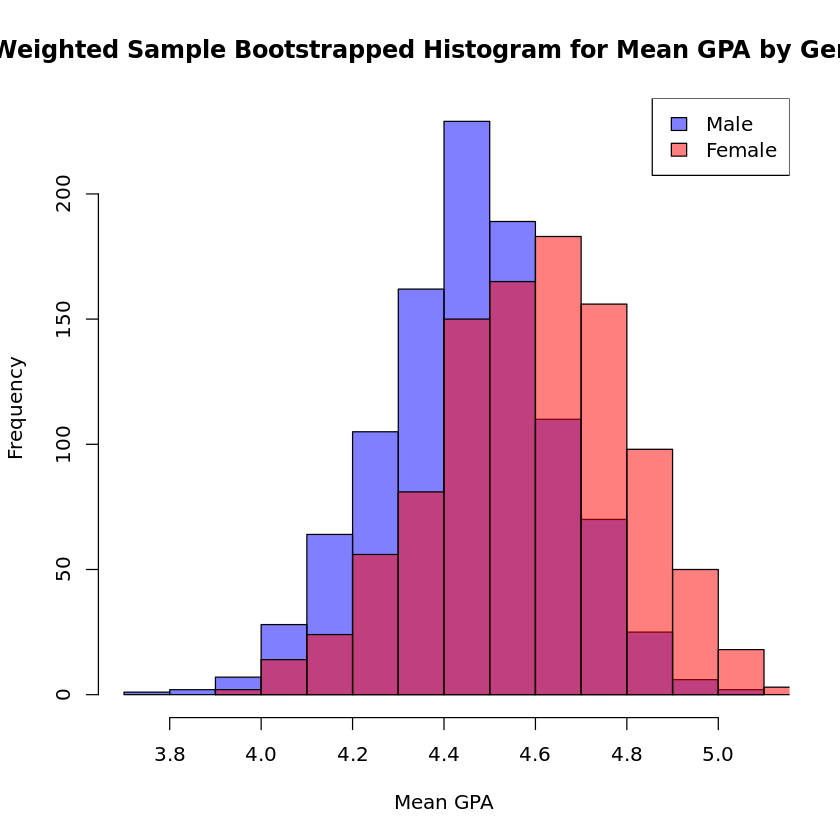

In [13]:
# [Place your Answer here]
set.seed(55)
meanGPAbygender <- data.frame(sample=integer(),FGPA=double(),MGPA=double())
for (i in 1:1000){
    set.seed(i)
    weighteddatasample<-data[sample(1:nrow(data),100,replace=TRUE,data$weights),]
    temp<-as.data.frame(aggregate(GPA~gender, weighteddatasample, mean))
    temp$gender<-NULL
    meanGPAbygender[i,]<-c(i,t(temp))
}
hist(meanGPAbygender$MGPA, col=rgb(0,0,1,0.5),main="Weighted Sample Bootstrapped Histogram for Mean GPA by Gender", xlab="Mean GPA")
hist(meanGPAbygender$FGPA, col=rgb(1,0,0,0.5),add=TRUE)
legend("topright", c("Male","Female"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))
maleWeighted1 <- mean(meanGPAbygender$MGPA[meanGPAbygender$sample == 1])
femaleWeighted1 <- mean(meanGPAbygender$FGPA[meanGPAbygender$sample == 1])

### Stratified Sampling

For Stratifed Sampling on s strata, we generate a SRSWR of size k for each and then combine to obtain a sample of size m=sk.  In the combined sample, each of the s strata has exactly k samples represented.

One way to achieve this in R is illustrated below.  

First we generate some random data with two strata.

In [14]:
sv<-data.frame(variable=double(),strata=integer())
sv[1:10,1]<-rnorm(10)
sv[1:10,2]<-as.numeric(sv[,1]>0)

Second, we split the data into two subsets, one for each stratum.

In [15]:
sv0<-sv[sv$strata==0,]$variable
sv1<-sv[sv$strata==1,]$variable

Third, we perform SRSWR to sample three times from each subset and then combine.

In [16]:
sv0sample<-sv0[sample(1:length(sv0),3,replace=TRUE)]
sv1sample<-sv1[sample(1:length(sv1),3,replace=TRUE)]
svsample<-rbind(sv0sample,sv1sample)

We can achieve the same effect as steps 2 and 3 using the following code.

In [17]:
sv0sample<-sv[sample(1:nrow(sv), 3, replace=TRUE,prob=(sv$strata==0)), 'variable']
sv1sample<-sv[sample(1:nrow(sv), 3, replace=TRUE,prob=(sv$strata==1)), 'variable']
svsample<-rbind(sv0sample,sv1sample)

|<center>TASK 2.3</center>|
| ---- |
Apply **stratified sampling** with strata `gender`, with **50** samples in each stratum. <br>Using this sampling approach, repeat the steps we carried out for SRSWR to create a **Stratified Sample Bootstrapped Histogram** for **Mean GPA by Gender**. <br> Store the mean values for male and female inside "maleStrata1" and "femaleStrata1" variables respectively.  <br> Set the seed to iteration number itself for bootstrapped sampling. <br> Remember: the iteration numbers are from 1 to 1000.|

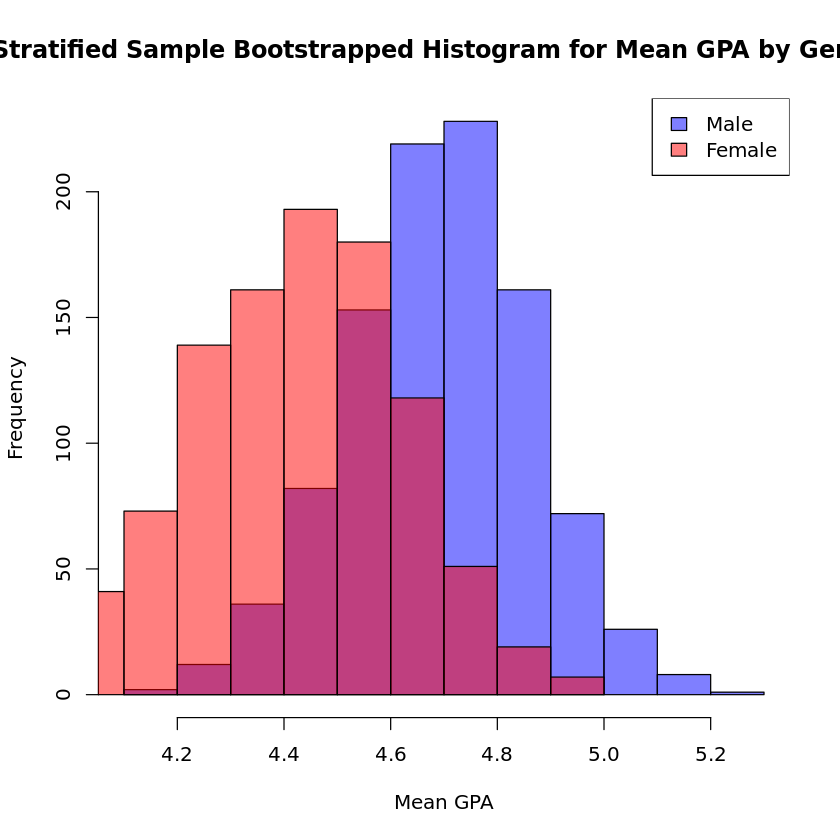

In [18]:
# [Place your Answer here]
set.seed(55)
maledata <- data[data$gender=='M',]
femaledata <- data[data$gender=='F',]
male <- maledata[sample(1:nrow(maledata), 50, replace=TRUE),]
female <- femaledata[sample(1:nrow(femaledata), 50, replace=TRUE),]
gpas<-rbind(male,female)
for (i in 1:1000){
    set.seed(i)
    datasample<-data[sample(1:nrow(gpas),100,replace=TRUE),]
    temp<-as.data.frame(aggregate(GPA~gender, datasample, mean))
    temp$gender<-NULL
    meanGPAbygender[i,]<-c(i,t(temp))
}
hist(meanGPAbygender$MGPA, col=rgb(0,0,1,0.5),main="Stratified Sample Bootstrapped Histogram for Mean GPA by Gender", xlab="Mean GPA")
hist(meanGPAbygender$FGPA, col=rgb(1,0,0,0.5),add=TRUE)
legend("topright", c("Male","Female"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))
maleStrata1 <- mean(meanGPAbygender$MGPA[meanGPAbygender$sample == 1])
femaleStrata1 <- mean(meanGPAbygender$FGPA[meanGPAbygender$sample == 1])

### Systematic sampling
Systematic sampling is a sampling technique that is used to sample from a sequence of items. To sample $n$ items from a sequence of $N$ items, we sample every $k$-th item, where $k = N/n$, and the starting point is randomly sampled from the first $k$ items.

|<center>TASK 2.4</center>|
| ---- |
|Consider using **systematic sampling** to sample **167** items from `data`. What is the value of $k$? How many different samples can you have? Store the average GPAs for these samples inside "systematic1" vector. |

In [21]:
# [Place your Answer here]
sample_number <- 167
N <- length(data$GPA)
k <- ceiling(N/sample_number)
systematic1 <- numeric(k)
for (i in 1:k) {
  indices <- seq(i, N, by=k)[1:sample_number]
  datasample <- data[indices, ]
  sample <- datasample$GPA
  systematic1[i] <- mean(sample)
}
systematic1

[1] 4.524072 4.707605 4.443892 4.464910 4.556707

# Extension

We have included some extra material demonstrating how data has been generated for the k-anonymity part of this prac, and how the Python programming language could alternatively be used for the K-anonymity task.

**THIS IS NOT ASSESSED**

If you are interested, you can read through the notebooks in the `data_preparation` directory of Prac 2. Try to see if you can follow what is being done.

The `KAnonymityWithPython` notebook demonstrates how you could potentially use the Python programming language instead of MySQL to perform the K-anonymity task of this practical.

The `GetUQPrograms` notebook demonstrates *web-scraping*, which was used to generate the dataset used in this prac by scraping real programs from the https://www.uq.edu.au/study/browse.html?level=ugpg page.

The `GenerateCSVs` notebook demonstrates how we can use Python to generate some sample data.
These three notebooks demonstrate how you could potentially use the Python programming language instead of MySQL to perform the the K-anonymity task of this practical. 

In [ ]:
print("This Line gets printed if there is no error, when Kernel -> Restart & Run All")